# ePSproc $\beta_{L,M}$ calculations demo

10/09/19

Source [notebook on Github](https://github.com/phockett/ePSproc/blob/master/epsproc/tests/ePSproc_BM_calc_demo_Sept2019.ipynb).

## Basic IO

In [1]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data')

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath)  

*** ePSproc readMatEle(): scanning files for DumpIdy segments (matrix elements)

*** Scanning dir
D:\code\github\ePSproc\data
Found 2 .out file(s)


*** Reading ePS output file:  D:\code\github\ePSproc\data\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Expecting 102 dumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of matrix elements (0 blank)

*** Reading ePS output file:  D:\code\github\ePSproc\data\no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Expecting 3 dumpIdy segments.
Found 3 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 3 sets of matrix elements (0 blank)


## Formalism

The $\beta_{L,M}$ parameters are defined as:

$    \begin{eqnarray}
    \beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{M}(-1)^{m}(-1)^{(\mu'-\mu_{0})}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
    l & l' & L\\
    0 & 0 & 0
    \end{array}\right)\left(\begin{array}{ccc}
    l & l' & L\\
    -m & m' & -M
    \end{array}\right)\nonumber \\
     & \times & \sum_{P,R',R}(2P+1)(-1)^{(R'-R)}\left(\begin{array}{ccc}
    1 & 1 & P\\
    \mu & -\mu' & R'
    \end{array}\right)\left(\begin{array}{ccc}
    1 & 1 & P\\
    \mu_{0} & -\mu_{0} & R
    \end{array}\right)D_{-R',-R}^{P}(R_{\hat{n}})I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
    \end{eqnarray}
$

Calculations use `ep.mfblm()`, which will calculate all values at each energy point for the supplied dataset.  This may take a while in some cases due to multiple nested sums - this code will be parallelised in future.

## $N_2$ mutli-E

Calculate $\beta_{LM}$ as function of energy.

In [3]:
daIn = dataSet[0].copy()

# BLMXeN2 = ep.mfblm(daIn[:, 1:4], selDims = {'Type':'L'}, thres = 1e-4)       # Subselected on Eke
start = time.time()
BLMXeN2 = ep.mfblm(daIn, selDims = {'Type':'L'}, thres = 1e-4)   # Run for all Eke
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points.'.format((end-start), BLMXeN2.Eke.size))

Calculating MFBLMs for 81 pairs... Eke = 0.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 1.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 2.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 3.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 4.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 5.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 6.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 7.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 8.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 9.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 10.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 11.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 12.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 13.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pair

In [4]:
BLMXeN2

<xarray.DataArray (Euler: 1, Eke: 51, BLM: 121)>
array([[[2.301322 +0.j, 0.       +0.j, ...,      nan+nanj,      nan+nanj],
        [2.382333 +0.j, 0.       +0.j, ...,      nan+nanj,      nan+nanj],
        ...,
        [0.092948 +0.j, 0.       +0.j, ..., 0.       +0.j, 0.       +0.j],
        [0.095428 +0.j, 0.       +0.j, ..., 0.       +0.j, 0.       +0.j]]])
Coordinates:
  * Euler    (Euler) MultiIndex
  - P        (Euler) int64 0
  - T        (Euler) int64 0
  - C        (Euler) int64 0
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 0 1 1 1 2 2 2 2 2 3 3 ... 10 10 10 10 10 10 10 10 10 10
  - m        (BLM) int64 0 -1 0 1 -2 -1 0 1 2 -3 -2 ... 0 1 2 3 4 5 6 7 8 9 10
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
Attributes:
    Lmax:      11
    Targ:      SG
    QNs:       ['m', 'l', 'mu', 'ip', 'it', 'Value']
    dataType:  BLM
    file:      n2_3sg_0.1-50.1eV_A2.inp.out
    fileBase:  D:\code\github\ePSproc\data
    thres:     0.0001
    s

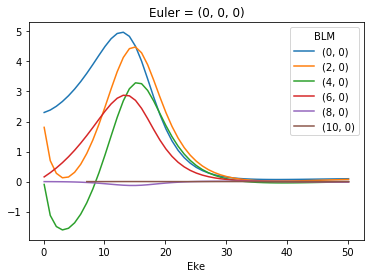

In [5]:
# Plot using Xarray functionality with thresholding
BLMXeN2.where(np.abs(BLMXeN2) > 1e-4, drop = True).real.squeeze().plot.line(x='Eke')

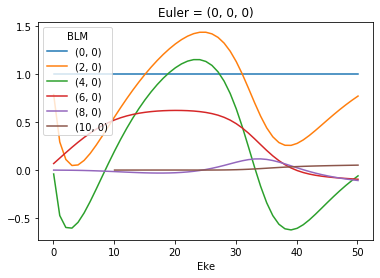

In [6]:
# Plot values normalised by B00
# This seems to work... probably a more elegant solution here, since this assumes dimension order.
normBLM = BLMXeN2/BLMXeN2[:,:,0]
normBLM.where(np.abs(normBLM) > 1e-4, drop = True).real.squeeze().plot.line(x='Eke')

### MFPADs: calculate & plot from $\beta_{LM}$

In [7]:
# Calculate & plot MFPADs from BLMs
# def MFPAD_BLM(BLMXin):
#     # Calculate YLMs    
#     YLMX = ep.sphCalc(BLMXin.l.max(), res=50)
#     YLMX = YLMX.rename({'LM':'BLM'})    # Switch naming for multiplication & plotting
#     MFPAD = BLMXin*YLMX
#     MFPAD = MFPAD.rename({'BLM':'LM'})

#     return MFPAD    

#  MFPAD = MFPAD_BLM(BLMXeN2)

MFPAD_N2, _ = ep.sphFromBLMPlot(BLMXeN2)

Plotting with mpl


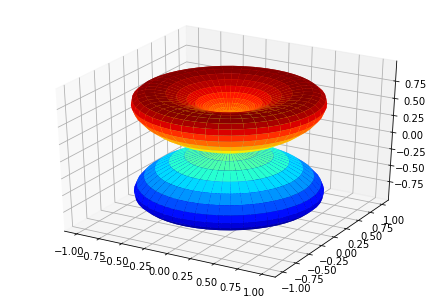

[<Figure size 432x288 with 1 Axes>]

In [8]:
# Plot single E with matplotlib
ep.sphSumPlotX(MFPAD_N2.sel({'Eke':1.1}).squeeze(), pType = 'r', backend = 'mpl')

N2 test data, MFPADs vs E


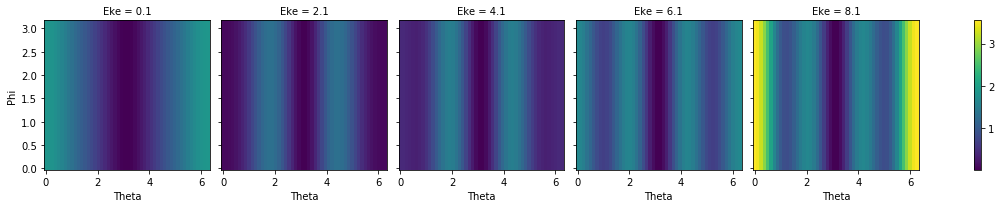

In [9]:
# Plot MFPAD surfaces vs E
print('N2 test data, MFPADs vs E')

MFPAD_N2.sum('LM').squeeze().isel(Eke=slice(0,10,2)).real.plot(x='Theta',y='Phi', col='Eke')

Plotting with mpl
Data dims: ('Euler', 'Eke', 'Theta', 'Phi'), subplots on Eke


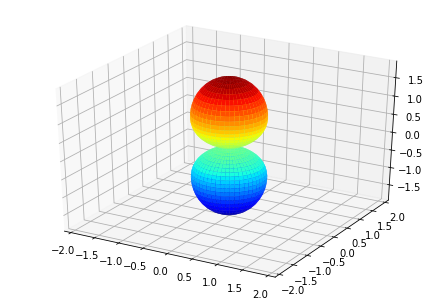

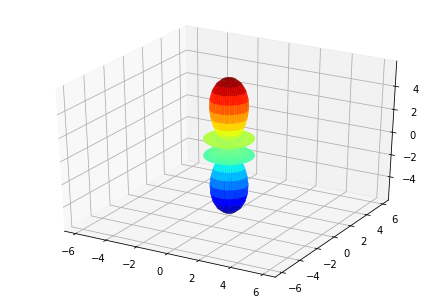

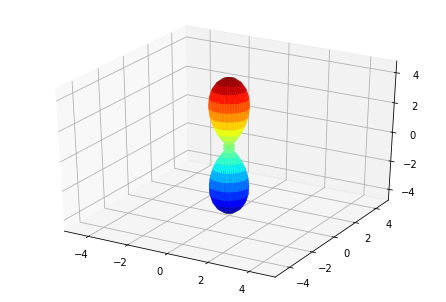

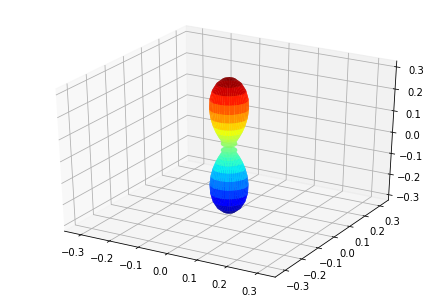

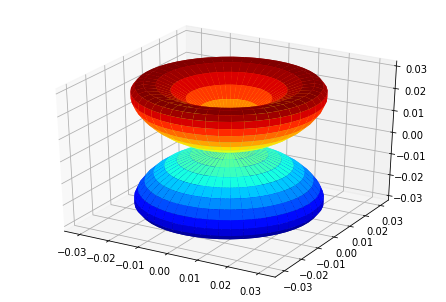

[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

In [10]:
# Plot multiple E with matplotlib
ep.sphSumPlotX(MFPAD_N2.isel(Eke=slice(0,50,10)), pType = 'r', backend = 'mpl')

In [11]:
# Plot multiple E with plotly (work in progress!)
# Broken since adding Euler angs...?
_ = ep.sphSumPlotX(MFPAD_N2.squeeze().isel(Eke=slice(0,50,10)), pType = 'r', backend = 'pl')

Plotting with pl


## $NO_2$ (x,y,z) polarizations

Benchmark results, single energy, multiple polarization geometries.

### Calculate

In [12]:
daIn = dataSet[1].copy()

# Set threshold for matrix elements & BLMs - this can speed up calculations significantly, but will affect accuracy.
thres = 1e-4

# For all pol geoms
pRot = [0, 0, np.pi/2]
tRot = [0, np.pi/2, np.pi/2]
cRot = [0, 0, 0]
eAngs = np.array([pRot, tRot, cRot]).T   # List form to use later, rows per set of angles

ts = []
BLMXeNO2list = []
for eIn in range(0,3):
    start = time.time()
    BLMXeNO2list.append(ep.mfblm(daIn, selDims = {'Type':'L'}, eAngs = eAngs[eIn,:], thres=thres))
    ts.append(time.time()-start)
    print('Elapsed time = {0} seconds'.format(ts[-1]))


Calculating MFBLMs for 12544 pairs... Eke = 0.81 eV, eAngs = ([0. 0. 0.])
Elapsed time = 124.42453789710999 seconds
Calculating MFBLMs for 12544 pairs... Eke = 0.81 eV, eAngs = ([0.         1.57079633 0.        ])
Elapsed time = 126.24425601959229 seconds
Calculating MFBLMs for 12544 pairs... Eke = 0.81 eV, eAngs = ([1.57079633 1.57079633 0.        ])
Elapsed time = 125.88551211357117 seconds


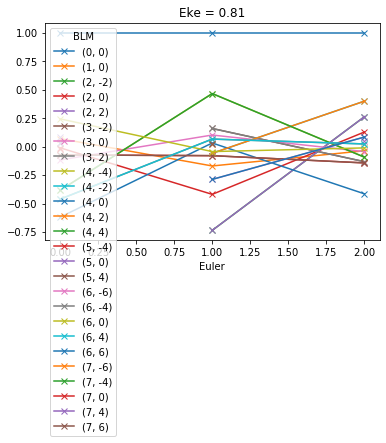

In [13]:
# Stack results - should improve on this and add eAngs stacking to mfblm code, but OK for testing
import xarray as xr
BLMXeNO2 = xr.combine_nested(BLMXeNO2list,'Euler')
# xr.combine_nested(Tlm, concat_dim=['Euler'])

# Plot values normalised by B00
# This seems to work... probably a more elegant solution here, since this assumes dimensions.
normBLM = BLMXeNO2/BLMXeNO2[:,:,0]

# With mag checking to avoid spurious division by small B00 terms...
# normBLM = BLMXeNO2.where(np.abs(BLMXeNO2[:,:,0]) > 1e-4, drop = True)
# normBLM = normBLM/normBLM[:,:,0]

# Replace multi-index with linear index for plotting (otherwise get coord errors)
normBLM['Euler'] = np.arange(0,normBLM.Euler.size)
normBLM.where(np.abs(normBLM) > 1e-2, drop = True).squeeze().real.plot.line('-x',x='Euler')

### MFPADs

Plotting with mpl
Data dims: ('Euler', 'Eke', 'Theta', 'Phi'), subplots on Euler


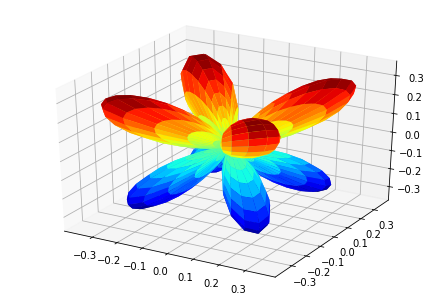

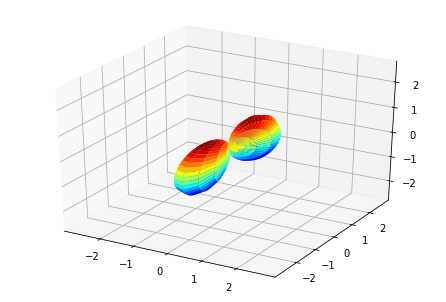

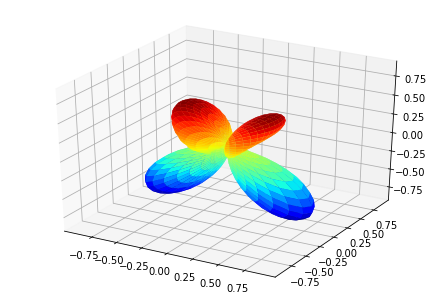

[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

In [14]:
MFPAD_NO2, _ = ep.sphFromBLMPlot(BLMXeNO2)

# Plot multiple E with matplotlib
ep.sphSumPlotX(MFPAD_NO2, pType = 'r', backend = 'mpl', facetDim = 'Euler')

### Benchmark vs. "direct" results

Compare against results from `ep.mfpad`, see main ["ePSproc demo notebook"](https://github.com/phockett/ePSproc/blob/pkg/epsproc/tests/ePSproc_demo_Aug2019.ipynb) for calculation details.

MFPADs for test NO2 dataset (single energy, (z,x,y) pol states)
Plotting with mpl


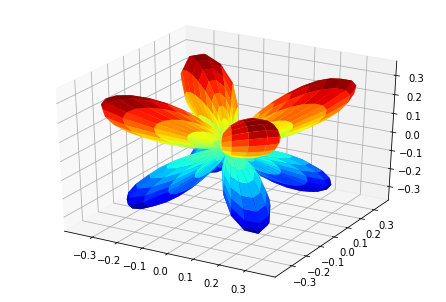

Plotting with mpl


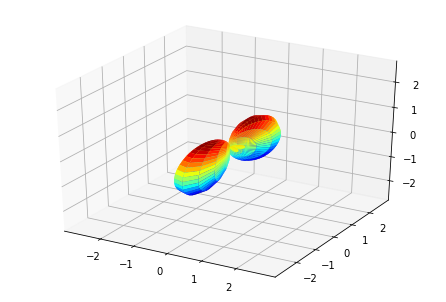

Plotting with mpl


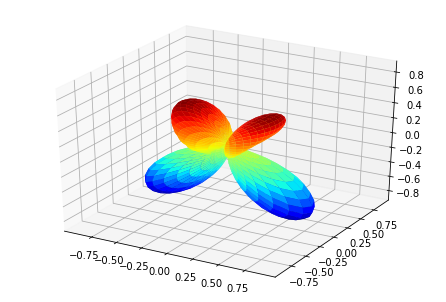

In [15]:
print('MFPADs for test NO2 dataset (single energy, (z,x,y) pol states)')
TX, TlmX = ep.mfpad(dataSet[1])

# Plot for each pol geom (symmetry)
for n in range(0,3):      
    ep.sphSumPlotX(TX[n].sum('Sym').squeeze()**2, pType = 'a')

(Visual comparison looks OK, still some benchmarks to to for numerical re/im comparisons, which currently show some differences.)